In [12]:

import requests
import time
import pandas as pd

symbol = 'ACMUSDT'
interval = '15m'
#interval = '1h'
limit = 1000
base_url = 'https://api.binance.com/api/v3/klines'

start_date_str = '2024-08-15'
#start_date_str = '2025-03-15'
start_time = int(time.mktime(time.strptime(start_date_str, '%Y-%m-%d'))) * 1000
end_time = int(time.time() * 1000)

candles = []
current_start = start_time

while current_start < end_time:
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': current_start,
        'limit': limit
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    if not data or 'code' in data:
        break

    candles.extend(data)
    current_start = data[-1][0] + 1

columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
           'Close Time', 'Quote Asset Volume', 'Number of Trades',
           'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']

df = pd.DataFrame(candles, columns=columns)
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')

df.to_csv('acm_usdt_15m.csv', index=False)
print("Saved to acm_usdt_15m.csv")


Saved to acm_usdt_1h.csv


In [13]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,2024-08-14 16:00:00,1.52700000,1.55100000,1.52000000,1.52000000,37527.10000000,2024-08-14 16:14:59.999,57736.31820000,759,22828.60000000,35159.96270000,0
1,2024-08-14 16:15:00,1.52100000,1.52200000,1.50100000,1.51000000,21295.10000000,2024-08-14 16:29:59.999,32116.65190000,249,3967.30000000,6000.29580000,0
2,2024-08-14 16:30:00,1.51000000,1.51100000,1.49800000,1.49800000,4131.20000000,2024-08-14 16:44:59.999,6210.76210000,159,1174.50000000,1766.49350000,0
3,2024-08-14 16:45:00,1.49800000,1.50600000,1.49800000,1.50600000,4634.50000000,2024-08-14 16:59:59.999,6956.66310000,176,1643.90000000,2467.76970000,0
4,2024-08-14 17:00:00,1.50400000,1.50900000,1.50300000,1.50500000,3749.30000000,2024-08-14 17:14:59.999,5646.08970000,214,1811.50000000,2729.60640000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22938,2025-04-10 14:30:00,0.78200000,0.78600000,0.78100000,0.78600000,1977.30000000,2025-04-10 14:44:59.999,1549.36910000,65,1892.70000000,1483.25390000,0
22939,2025-04-10 14:45:00,0.78600000,0.78600000,0.78100000,0.78300000,2702.40000000,2025-04-10 14:59:59.999,2119.26330000,83,1631.60000000,1280.21620000,0
22940,2025-04-10 15:00:00,0.78300000,0.78400000,0.77800000,0.78000000,4152.50000000,2025-04-10 15:14:59.999,3243.09620000,100,1302.50000000,1018.65800000,0
22941,2025-04-10 15:15:00,0.78000000,0.78000000,0.77300000,0.77500000,2644.80000000,2025-04-10 15:29:59.999,2052.87090000,112,984.30000000,765.23620000,0


/Users/aa2/miniconda3/envs/cryt310/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


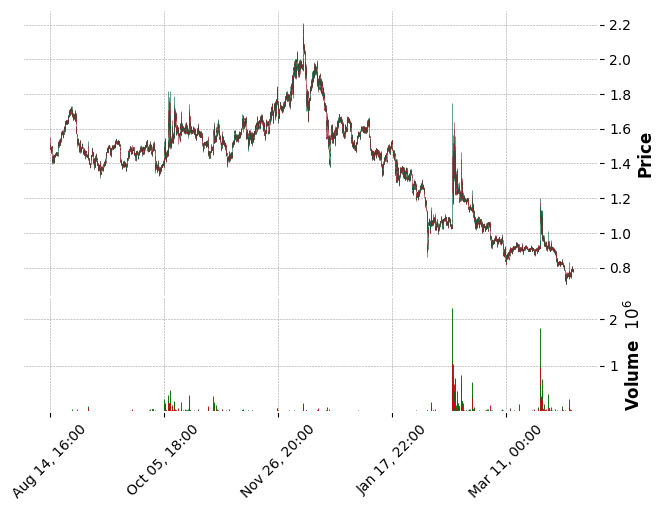

In [14]:
import pandas as pd
import mplfinance as mpf

# Load the CSV
df = pd.read_csv('acm_usdt_15m.csv', parse_dates=['Open Time'])

# Prepare DataFrame for plotting
df.set_index('Open Time', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# Plot the candlestick chart
mpf.plot(df, type='candle', volume=True, style='charles')
